# Pymaceuticals Inc.
---

### Analysis

* There are total of 248 mice observed without duplicates, composing of 51% males and 49% females. These mices undergone 10 different treatments. Capomulin has been administered 230 time compared to Propriva's 148 times. 

* The correlation between mouse weight and the average tumor volume is 0.84 which is above 0.70 that directly relates to increase of weight to the increase of average tumor volume. 

* Referring to the boxplot, Infubinol has one outlier. The regression analysis show r-squared is 0.709. The average tumor volume is directly related to the change of weight of mice. As the weight increases the probability of the tumor volume increases. 

* From the data provided, Capomulin reduces the size of tumor effectively. 


In [455]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combined_df.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [456]:
# Checking the number of mice.
number_mice = combined_df["Mouse ID"].nunique()
number_mice

249

In [457]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [458]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = combined_df.loc[combined_df["Mouse ID"] == 'g989', :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [459]:
# Optional: Get all the data for the duplicate mouse ID. 


In [460]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice_ID)==False]
clean_df.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [461]:
# Checking the number of mice in the clean DataFrame.
clean_number_mice = clean_df["Mouse ID"].nunique()
clean_number_mice

248

## Summary Statistics

In [462]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Volume": mean,
                                  "Median Tumor Volume": median,
                                  "Tumor Volume Variance": var,
                                  "Tumor Volume Std. Dev.": std,
                                  "Tumor Volume Std. Err.": sem})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,40.675741,40.675741,40.675741
Ceftamin,52.591172,52.591172,52.591172,52.591172,52.591172
Infubinol,52.884795,52.884795,52.884795,52.884795,52.884795
Ketapril,55.235638,55.235638,55.235638,55.235638,55.235638
Naftisol,54.331565,54.331565,54.331565,54.331565,54.331565
Placebo,54.033581,54.033581,54.033581,54.033581,54.033581
Propriva,52.320930,52.320930,52.320930,52.320930,52.320930
Ramicane,40.216745,40.216745,40.216745,40.216745,40.216745
Stelasyn,54.233149,54.233149,54.233149,54.233149,54.233149


In [463]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_summary = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregate_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [464]:
number_of_mice_observed = clean_df["Mouse ID"].value_counts()
number_of_mice_observed

Mouse ID
k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: count, Length: 248, dtype: int64

In [465]:
drug_regimens = clean_df["Drug Regimen"].value_counts()
drug_regimens

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

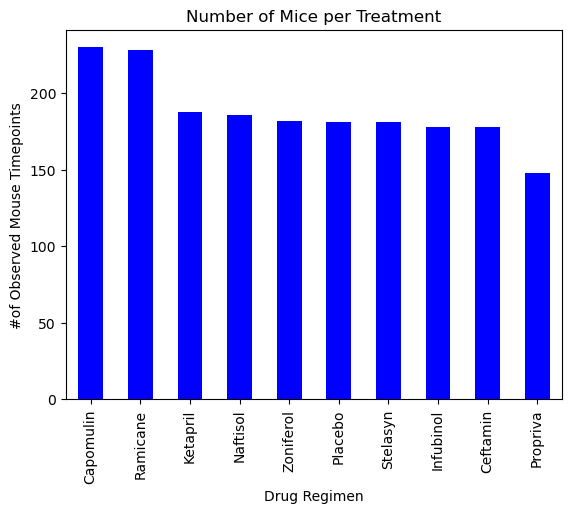

In [466]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_pandas = drug_regimens.plot.bar(color='b')
plt.xlabel('Drug Regimen')
plt.ylabel('#of Observed Mouse Timepoints')
plt.title('Number of Mice per Treatment')

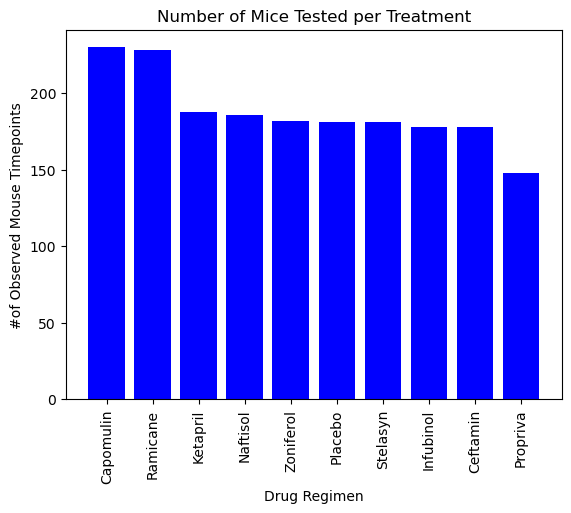

In [467]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_regimens.index.values
y_axis = drug_regimens.values

plt.bar(x_axis,y_axis, color='b', alpha=1, align='center')
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("#of Observed Mouse Timepoints")
plt.title("Number of Mice Tested per Treatment")
plt.show()

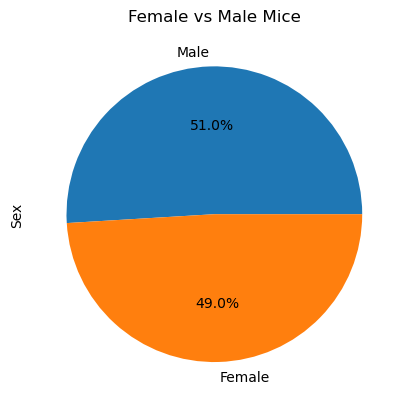

In [468]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df['Sex'].value_counts(0)
#gender
gender.plot.pie(autopct="%1.1f%%")
plt.title("Female vs Male Mice")
plt.ylabel("Sex")
plt.show()

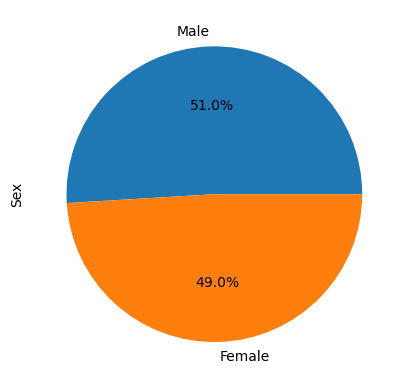

In [469]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#labels = ['Male', 'Female']
plt.pie(gender, labels=labels, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [470]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

In [471]:
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin',:]
Ramicane_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane',:]
Infubinol_df = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol',:]
Ceftamin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin',:]
Capomulin_df.head(5)
Ramicane_df.head(5)
Infubinol_df.head(5)
Ceftamin_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1


In [472]:
#Results for Capomulin

In [473]:
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_merge_df = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge_df.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [474]:
Capomulin_Tumors = Capomulin_merge_df["Tumor Volume (mm3)"]
Capomulin_Tumors.head(10)

0    38.982878
1    38.939633
2    30.485985
3    37.074024
4    40.159220
5    47.685963
6    37.311846
7    38.125164
8    38.753265
9    41.483008
Name: Tumor Volume (mm3), dtype: float64

In [475]:
quartiles =Capomulin_Tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin Tumors: {lowerq}")
print(f"The upper quartile of Capomulin Tumors: {upperq}")
print(f"The interquartile range of Capomulin Tumors: {iqr}")
print(f"The median of Capomulin Tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print(f"Capomulin has no potential outliers.")

The lower quartile of Capomulin Tumors: 32.37735684
The upper quartile of Capomulin Tumors: 40.1592203
The interquartile range of Capomulin Tumors: 7.781863460000004
The median of Capomulin Tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin has no potential outliers.


In [476]:
#Results for Ramicane

In [477]:
# Start by getting the last (greatest) timepoint for each mouse
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ramicane_merge_df = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge_df.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [478]:
Ramicane_Tumors = Ramicane_merge_df["Tumor Volume (mm3)"]
Ramicane_Tumors.head(5)

0    38.407618
1    43.047543
2    38.810366
3    32.978522
4    38.342008
Name: Tumor Volume (mm3), dtype: float64

In [479]:
quartiles =Ramicane_Tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane Tumors: {lowerq}")
print(f"The upper quartile of Ramicane Tumors: {upperq}")
print(f"The interquartile range of Ramicane Tumors: {iqr}")
print(f"The median of Ramicane Tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print(f"Ramicane has no potential outliers.")

The lower quartile of Ramicane Tumors: 31.56046955
The upper quartile of Ramicane Tumors: 40.65900627
The interquartile range of Ramicane Tumors: 9.098536719999998
The median of Ramicane Tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane has no potential outliers.


In [480]:
#Results for Infubinol

In [481]:
# Start by getting the last (greatest) timepoint for each mouse
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Infubinol_merge_df = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge_df.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [482]:
Infubinol_Tumors = Infubinol_merge_df["Tumor Volume (mm3)"]
Infubinol_Tumors.head(10)

0    67.973419
1    65.525743
2    57.031862
3    66.083066
4    72.226731
5    36.321346
6    60.969711
7    62.435404
8    60.918767
9    67.289621
Name: Tumor Volume (mm3), dtype: float64

In [483]:
quartiles =Infubinol_Tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol Tumors: {lowerq}")
print(f"The upper quartile of Infubinol Tumors: {upperq}")
print(f"The interquartile range of Infubinol Tumors: {iqr}")
print(f"The median of Infubinol Tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")




The lower quartile of Infubinol Tumors: 54.04860769
The upper quartile of Infubinol Tumors: 65.52574285
The interquartile range of Infubinol Tumors: 11.477135160000003
The median of Infubinol Tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [484]:
#Results for Ceftamin

In [485]:
# Start by getting the last (greatest) timepoint for each mouse
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ceftamin_merge_df = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge_df.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [486]:
Ceftamin_Tumors = Ceftamin_merge_df["Tumor Volume (mm3)"]
Ceftamin_Tumors.head(10)

0    62.999356
1    45.000000
2    56.057749
3    55.742829
4    48.722078
5    47.784682
6    61.849023
7    68.923185
8    67.748662
9    57.918381
Name: Tumor Volume (mm3), dtype: float64

In [487]:
Ceftamin_Tumors = Ceftamin_merge_df["Tumor Volume (mm3)"]
quartiles =Ceftamin_Tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin Tumors: {lowerq}")
print(f"The upper quartile of Ceftamin Tumors: {upperq}")
print(f"The interquartile range of Ceftamin Tumors: {iqr}")
print(f"The median of Ceftamin Tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print(f"Ceftamin has no potential outliers.")



The lower quartile of Ceftamin Tumors: 48.72207785
The upper quartile of Ceftamin Tumors: 64.29983003
The interquartile range of Ceftamin Tumors: 15.577752179999997
The median of Ceftamin Tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Ceftamin has no potential outliers.


In [488]:
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_df[combined_df["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [489]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [490]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


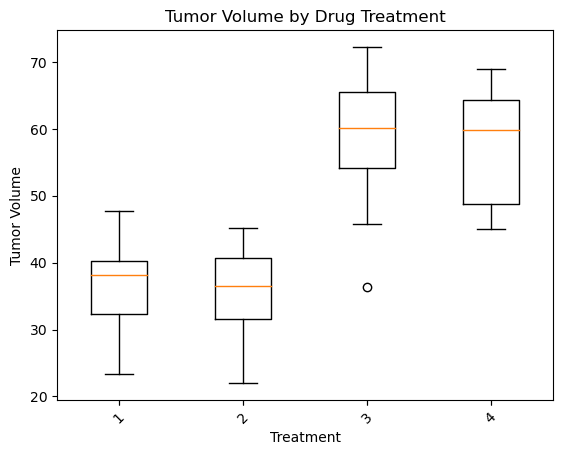

In [491]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.xlabel("Treatment")
plt.xticks([1,2,3,4], drug_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Treatment")
plt.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

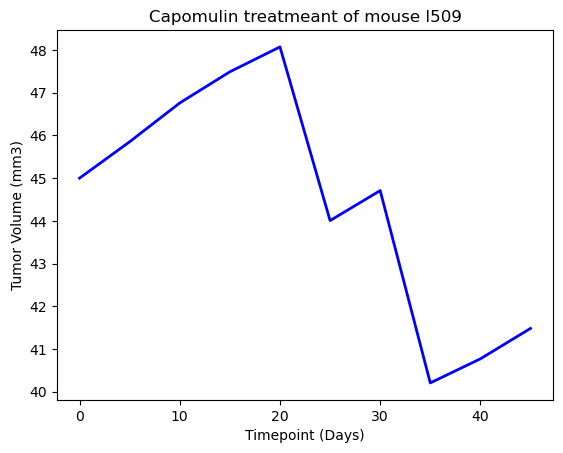

In [492]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis,linewidth=2,color="blue")
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

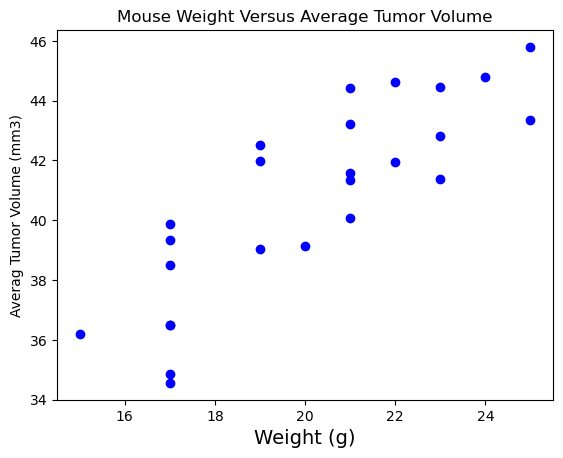

In [493]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_ave_observe = Capomulin_df.groupby(['Mouse ID']).mean(numeric_only=True) 
plt.scatter(weight_ave_observe['Weight (g)'],weight_ave_observe['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')


## Correlation and Regression

In [494]:
# Calculate the correlation and regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight_ave_observe['Weight (g)'],weight_ave_observe['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


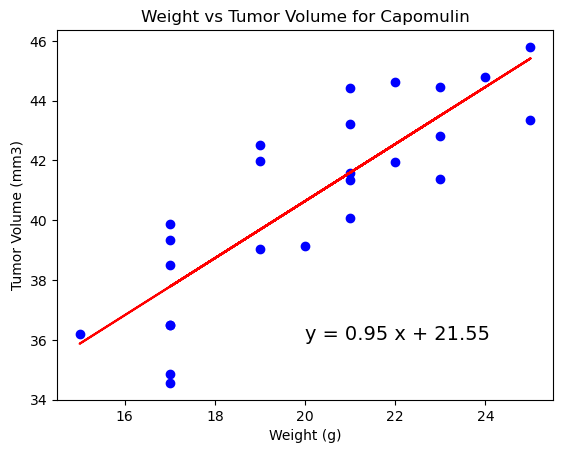

In [495]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(weight_ave_observe["Weight (g)"],weight_ave_observe["Tumor Volume (mm3)"])
regress_values=weight_ave_observe["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(weight_ave_observe["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(weight_ave_observe["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()